# Part 2: Logistic Regression
## Description
- A statistical / machine learning model for classification, specifically binary (`positive or 1` class vs `negative or 0` class) classification.
- Model the probability that a given input point belongs to the positive class (negative probability is just `1 - positive probability`)

$$ P(Y=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X)}} $$

- Uses the `logistic function (Sigmoid function)` to model the linear predicted output (from a linear regression) into a binary output variable.
- The logistic function converts any input to a value between 0 and 1, which is interpreted as a probability of the instance belonging to the positive class.

  ![log_reg](../assets/log_reg.png)

## Concepts:

### Odds 
  $$ \frac{P(Y=1)}{1 - P(Y=1)} $$

In the context of probability, "odds" is a way of expressing the likelihood that a particular event will occur. Odds are calculated as the ratio of the probability of the event occurring to the probability of the event not occurring.

### Log-Odds 
  $$ \log\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) = \beta_0 + \beta_1X $$
  - Log odds, or the logit function, is the logarithm of the odds. In logistic regression, the logit function is used to create a linear combination of the independent variables.
  - The logistic function is the inverse of the logit function. It takes the log odds and transforms them back into a probability.

**Example**: Binary classification tasks such as email spam detection, image recognition, etc.

## Maximum Likelihood Estimation

**Objective**: Find the values of coefficients that maximize the `likelihood (function)` of observing the given sample.

**Likelihood Function**: Measures how well our model explains the observed data.

**Procedure**:
  1. Define the likelihood function for the logistic regression model.
  2. Use optimization techniques (e.g., gradient descent) to maximize the likelihood function.
  3. The values of coefficients that maximize the likelihood function are considered as the estimates.

## Hands-On: Scikit-Learn Tutorial

**Activity:** For this tutorial, we'll use the Iris dataset, which is a classic dataset for classification. The dataset contains 150 observations of iris flowers. 

**Mode:** Class Walkthrough

**⚡ Task:**
1. Load the `iris` dataset from `sklearn`.
2. Convert the problem to binary classification.
3. Split the dataset into training and testing sets.
4. Train the logistic regression model.
5. Evaluate the model on the test set.
6. Plot the decision boundary.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Step 1: Load the dataset

iris = load_iris()
X = iris.data
y = iris.target

We'll need to convert the problem to a binary classification for logistic regression. Drop the additional class.

In [26]:
# Step 2: Convert to binary classification problem

X = X[y != 2]   # Keep only X samples where the corresponding y value is NOT 2  
y = y[y != 2]   # Keep only y to keep only values that are NOT 2, ensuring X and y remain aligned
y.shape

(100,)

In [27]:
# Step 3: Split the data into training (70%) and testing (30%) sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Step 4: Train the Logistic Regression model

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

We'll use `Accuracy Score` to evaluate the performance of the model.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Observations}} $$

> There are many more metrics to evaluate classification models, which we'll cover in the next unit.

In [28]:
# Step 5: Evaluate the model on the test set.

print("Accuracy:", accuracy_score(y_test, y_pred))

iris.feature_names

Accuracy: 1.0


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

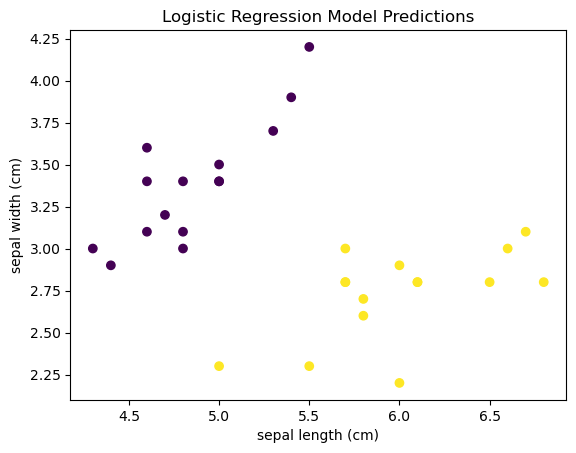

In [29]:
# 6. Plot the decision boundary.
# Create a scatter plot of the test data points (first two features), coloring them by their predicted class labels

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

plt.xlabel(f'{iris.feature_names[0]}')
plt.ylabel(f'{iris.feature_names[1]}')
plt.title('Logistic Regression Model Predictions')
plt.show()

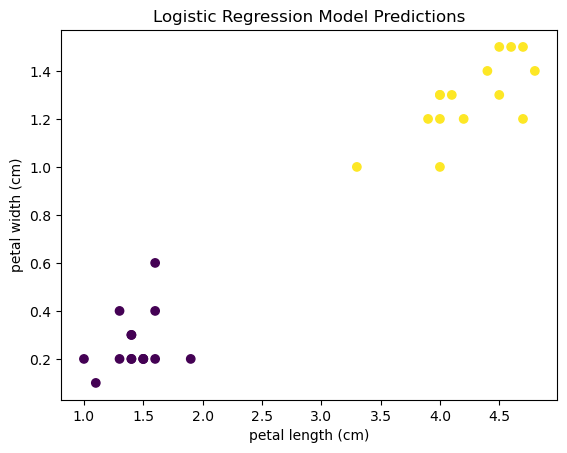

In [30]:
# Scatter plot of the test data (using the 3rd and 4th features), colored by predicted class labels

plt.scatter(X_test[:, 2], X_test[:, 3], c=y_pred)

plt.xlabel(f'{iris.feature_names[2]}')
plt.ylabel(f'{iris.feature_names[3]}')
plt.title('Logistic Regression Model Predictions')
plt.show()

## Self-Study: Statsmodels Tutorial

We can also implement logistic regression using the `statsmodels` library.

Again, the benefits of statsmodels is it provides extensive statistical diagnostics and tests about the model, such as _p-values, confidence intervals, and in-depth analysis of residuals._

Let's use another more realistic dataset such as the _Pima Indians Diabetes_ dataset.

In [31]:
import statsmodels.api as sm

# Load the Pima Indians Diabetes dataset from a remote URL with specified column names
# and preview the first 5 rows of the dataframe.

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
pima = pd.read_csv(url, names=column_names)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's try to predict the diabetes outcome using glucose, BMI and age.

In [32]:
features = ['Glucose', 'BMI', 'Age']
X = pima[features]
y = pima['Outcome']

In [33]:
# Prepare the features by adding a constant, split the data into training and testing sets, 
# and fit a statsmodels Logistic Regression model to review its statistical summary.

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.490188
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      533
Method:                           MLE   Df Model:                            3
Date:                Thu, 18 Dec 2025   Pseudo R-squ.:                  0.2506
Time:                        19:34:00   Log-Likelihood:                -263.23
converged:                       True   LL-Null:                       -351.27
Covariance Type:            nonrobust   LLR p-value:                 6.168e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.6925      0.815    -10.670      0.000     -10.289      -7.096
Glucose        0.0317      0.004      7.899      0.000       0.024       0.040
BMI            0.0885      0.016      5.406      0.000       0.056       0.121
Age            0.0352      0.009      3.832      0.000       0.017       0.053
==============================================================================
"""

In [34]:
# Generate binary class predictions from the model and evaluate classification accuracy.

y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7575757575757576
